<h1>Machine Learning - Project</h1>
<h3>California Housing Price Predication</h3>
<h5>By - Anishka Patel email: anishka.vpatel@gmail.com</h5>

<p>DESCRIPTION <br>
<br>
Background of Problem Statement :<br>
<br>
The US Census Bureau has published California Census Data which has 10 types of metrics <br>
such as the population, median income, median housing price, and so on for each block <br>
group in California. The dataset also serves as an input for project scoping and tries to <br>
specify the functional and nonfunctional requirements for it.<br>
<br>
Problem Objective :<br>
<br>
The project aims at building a model of housing prices to predict median house values <br>
in California using the provided dataset. This model should learn from the data and be <br>
able to predict the median housing price in any district, given all the other metrics.<br>
<br>
Districts or block groups are the smallest geographical units for which the US Census <br>
Bureau publishes sample data (a block group typically has a population of 600 to 3,000 <br>
people). There are 20,640 districts in the project dataset.<br></p>
<p>
Analysis Tasks to be performed:
<ol>
<li>Build a model of housing prices to predict median house values in California using <br>the provided dataset.

<li>Train the model to learn from the data to predict the median housing price in any <br>district, given all the other metrics.

<li>Predict housing prices based on median_income and plot the regression chart for it.</ol></p>

In [1]:
# IMPORTS

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<h4>1. Load the data :</h4>
<li>Read the “housing.csv” file from the folder into the program.

In [2]:
df = pd.read_excel('1553768847_housing.xlsx')

<li>Print first few rows of this data.

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [43]:
df[df['median_house_value'] > 500000].count()

longitude             965
latitude              965
housing_median_age    965
total_rooms           965
total_bedrooms        958
population            965
households            965
median_income         965
ocean_proximity       965
median_house_value    965
dtype: int64

<li>Extract input (X) and output (Y) data from the dataset.

In [4]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:,-1]
print(X.head())
print(Y.head())

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                  41          880           129.0         322         126   
1                  21         7099          1106.0        2401        1138   
2                  52         1467           190.0         496         177   
3                  52         1274           235.0         558         219   
4                  52         1627           280.0         565         259   

   median_income ocean_proximity  
0         8.3252        NEAR BAY  
1         8.3014        NEAR BAY  
2         7.2574        NEAR BAY  
3         5.6431        NEAR BAY  
4         3.8462        NEAR BAY  
0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64


<h4>2. Handle missing values :</h4>
<li>Fill the missing values with the mean of the respective column.

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 1.1+ MB


<p> Column: total_bedrooms has some null values </p>

In [6]:
# Handling missing data
mean_total_bedrooms = X['total_bedrooms'].mean()
mean_total_bedrooms

537.8705525375618

In [7]:
X['total_bedrooms'].fillna(value=mean_total_bedrooms, axis=0, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 1.1+ MB


<p> No null values in X </p>

<h4>3. Encode categorical data :</h4>
<li>Convert categorical column in the dataset to numerical data.

In [8]:
X = pd.get_dummies(X, columns=['ocean_proximity'])
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,52,1627,280.0,565,259,3.8462,0,0,0,1,0


<h4>4. Split the dataset : </h4>
<li>Split the data into 80% training dataset and 20% test dataset.

In [9]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.2, random_state=15)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(16512, 11)
(4128, 11)
(16512,)
(4128,)


C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<h4>5. Standardize data :</h4>
<li>Standardize training and test datasets.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = pd.DataFrame(data=scaler.fit_transform(Xtrain))
Xtest = pd.DataFrame(data=scaler.fit_transform(Xtest))
print(Xtrain.head())
print(Xtest.head())

         0         1         2         3         4         5         6   \
0 -1.479975 -0.989472 -1.012499 -1.060311 -1.058113 -0.892478 -0.891506   
1  0.261625  0.185907  0.674387  0.250759  0.585480 -0.350094 -0.891506   
2 -0.213356 -0.685503 -0.346942  0.407092 -0.260252 -0.839358  1.121698   
3 -0.767502  1.920812  2.194278  2.472293  2.385986  0.046856  1.121698   
4  1.053262 -0.682710 -0.659149 -0.335492 -0.683118 -0.168301  1.121698   

         7         8         9         10  
0 -0.682289 -0.017404  2.828138 -0.383283  
1 -0.682289 -0.017404  2.828138 -0.383283  
2 -0.682289 -0.017404 -0.353590 -0.383283  
3 -0.682289 -0.017404 -0.353590 -0.383283  
4 -0.682289 -0.017404 -0.353590 -0.383283  
         0         1         2         3         4         5         6   \
0  1.902821 -0.517923 -0.408778 -0.492543 -0.391786 -0.481546 -0.889757   
1  0.611848 -0.665987 -0.634690 -0.827466 -0.876374 -1.039469 -0.889757   
2 -1.485984  0.105071  0.034011  0.207515  0.060823 -0.00926

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<h4>6. Perform Linear Regression : </h4>
<li>Perform Linear Regression on training data.

In [11]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(Xtrain, Ytrain)

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<li>Predict output for test dataset using the fitted model.

In [12]:
Ypred_lr = model_lr.predict(Xtest)

In [13]:
model_lr.score(Xtest, Ytest)

0.6279244012499515

<li>Print root mean squared error (RMSE) from Linear Regression.

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(Ytrain, model_lr.predict(Xtrain))))
print(sqrt(mean_squared_error(Ytest, model_lr.predict(Xtest))))

69738.99783909012
70338.55535453843


<h4>7. Perform Decision Tree Regression :</h4>
<li>Perform Decision Tree Regression on training data.

In [15]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor()
model_dtr.fit(Xtrain, Ytrain)

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<li>Predict output for test dataset using the fitted model.

In [16]:
model_dtr.score(Xtest, Ytest)

0.4385746399601793

<li>Print root mean squared error from Decision Tree Regression.

In [17]:
print(sqrt(mean_squared_error(Ytrain, model_dtr.predict(Xtrain))))
print(sqrt(mean_squared_error(Ytest, model_dtr.predict(Xtest))))

0.0
86402.01338821794


<h4>8. Perform Random Forest Regression :</h4>
<li>Perform Random Forest Regression on training data.

In [18]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor()
model_rfr.fit(Xtrain, Ytrain)

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<li>Predict output for test dataset using the fitted model.

In [19]:
model_rfr.score(Xtest, Ytest)

0.6773359794232248

<li>Print RMSE (root mean squared error) from Random Forest Regression.

In [20]:
print(sqrt(mean_squared_error(Ytrain, model_rfr.predict(Xtrain))))
print(sqrt(mean_squared_error(Ytest, model_rfr.predict(Xtest))))

27237.640451566767
65501.782741873074


<h4>9. Bonus exercise: Perform Linear Regression with one independent variable :</h4>
<li>Extract just the median_income column from the independent variables (from X_train and X_test).

In [21]:
Xtrainb = Xtrain[[5]]
Xtestb = Xtest[[5]]
print(Xtrainb.head())
print(Xtestb.head())

          5
0 -0.892478
1 -0.350094
2 -0.839358
3  0.046856
4 -0.168301
          5
0 -0.481546
1 -1.039469
2 -0.009265
3  1.605853
4 -1.175225


<li>Perform Linear Regression to predict housing values based on median_income.

In [22]:
model_lrb = LinearRegression()
model_lrb.fit(Xtrainb, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<li>Predict output for test dataset using the fitted model.

In [23]:
model_lrb.score(Xtestb, Ytest)

0.4593220819728651

In [24]:
print(sqrt(mean_squared_error(Ytrain, model_lrb.predict(Xtrainb))))
print(sqrt(mean_squared_error(Ytest, model_lrb.predict(Xtestb))))

83470.55503439721
84790.49410859433


<li>Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

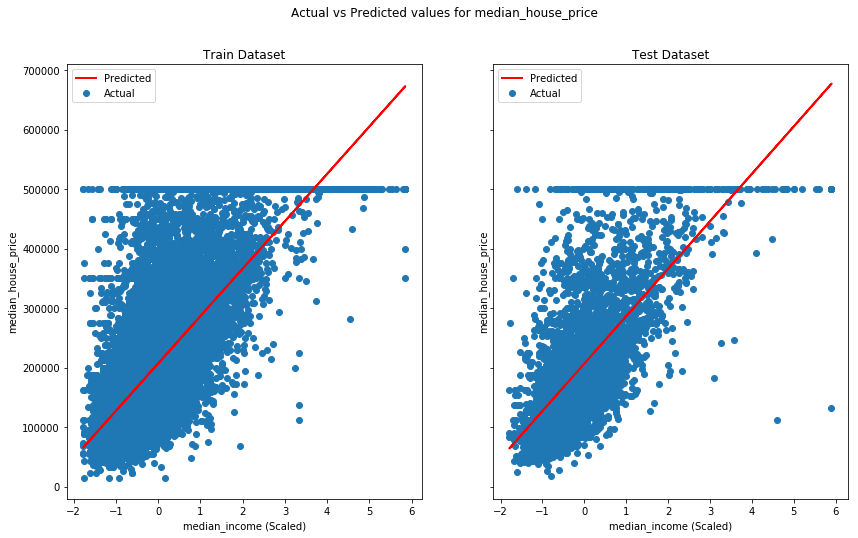

In [75]:
fig, axs = plt.subplots(1, 2, sharey=True,figsize=(14,8))
axs[0].scatter(Xtrainb, Ytrain)
axs[0].plot(Xtrainb, model_lrb.predict(Xtrainb), color='r', lw=2)
axs[0].set_title('Train Dataset')
axs[0].set_xlabel('median_income (Scaled)')
axs[0].set_ylabel('median_house_price')
axs[0].legend(['Predicted', 'Actual'])
axs[1].scatter(Xtestb, Ytest)
axs[1].plot(Xtestb, model_lrb.predict(Xtestb), color='r', lw=2)
axs[1].set_title('Test Dataset')
axs[1].set_xlabel('median_income (Scaled)')
axs[1].set_ylabel('median_house_price')
plt.suptitle('Actual vs Predicted values for median_house_price')
axs[1].legend(['Predicted', 'Actual'])
plt.show()